# Time Series

In [145]:
import numpy as np
import pandas as pd

### Date and Time Data Types and Tools

In [146]:
# datetime is a built-in Python module for date and time data
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2025, 3, 11, 11, 2, 21, 657079)

In [147]:
now.year, now.month, now.day

(2025, 3, 11)

In [148]:
# timedelta represents the temporal difference between two datetime objects
delta = now - datetime(1993, 8, 30)
delta

datetime.timedelta(11516, 39741, 657079)

In [149]:
delta.days

11516

In [150]:
# Adding a timedelta to a datetime object yields a new datetime object
from datetime import timedelta
start = datetime(1996, 5, 16)
start + timedelta(8417)

datetime.datetime(2019, 6, 2, 0, 0)

Converting Between String and Datetime

In [151]:
# You can format datetime objects as strings
stamp = datetime(2012, 5, 20)
str(stamp)

'2012-05-20 00:00:00'

In [152]:
stamp.strftime("%m-%d-%Y")

'05-20-2012'

In [153]:
# strptime converts strings to datetime objects
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [154]:
# The pandas method to_datetime is able to parse many different kinds of date representations
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:01:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:01:00'], dtype='datetime64[ns]', freq=None)

In [155]:
# to_datetime also handles missing values
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:01:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [156]:
# A basic time series object is a Series indexed by time stamps
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.624202
2011-01-05    1.874091
2011-01-07    0.480209
2011-01-08    1.059650
2011-01-10    1.139932
2011-01-12   -1.123796
dtype: float64

In [157]:
# The index for ts has been put in a DatetimeIndex
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [158]:
# Arithmetic operations align on the dates
ts + ts[::2]

2011-01-02   -1.248403
2011-01-05         NaN
2011-01-07    0.960417
2011-01-08         NaN
2011-01-10    2.279864
2011-01-12         NaN
dtype: float64

In [159]:
# Check data type of the time stamps
ts.index.dtype

dtype('<M8[ns]')

In [160]:
# Scalar values from the index are pandas Timestamp objects
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

Indexing, Selection, Subsetting

In [161]:
# Indexing and selecting work like normal
stamp = ts.index[2]
ts[stamp]

0.48020860582853453

In [162]:
# Can also pass a string
ts["2011-01-10"]

1.1399318526672624

In [163]:
# With long time series, you can select a year or a year and a month
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range("2000-01-01", periods=1000))
longer_ts

2000-01-01    1.237954
2000-01-02   -0.294712
2000-01-03   -0.555301
2000-01-04    0.920632
2000-01-05   -0.257050
                ...   
2002-09-22   -0.858941
2002-09-23    1.477060
2002-09-24    0.204520
2002-09-25    0.980866
2002-09-26    1.728609
Freq: D, Length: 1000, dtype: float64

In [164]:
longer_ts["2002"]

2002-01-01    0.875467
2002-01-02   -1.377531
2002-01-03   -0.663746
2002-01-04    0.344960
2002-01-05    0.510136
                ...   
2002-09-22   -0.858941
2002-09-23    1.477060
2002-09-24    0.204520
2002-09-25    0.980866
2002-09-26    1.728609
Freq: D, Length: 269, dtype: float64

In [165]:
longer_ts["2002-03"]

2002-03-01    0.128624
2002-03-02   -0.357571
2002-03-03    0.273061
2002-03-04   -1.075390
2002-03-05   -1.322276
2002-03-06   -0.337701
2002-03-07    0.583374
2002-03-08    0.402707
2002-03-09   -1.047857
2002-03-10   -0.238134
2002-03-11    1.741783
2002-03-12    1.666177
2002-03-13   -0.024198
2002-03-14    0.587537
2002-03-15   -0.102785
2002-03-16   -0.184755
2002-03-17   -0.504263
2002-03-18    0.438665
2002-03-19   -0.825889
2002-03-20   -2.076347
2002-03-21   -0.416952
2002-03-22    1.126231
2002-03-23    0.919941
2002-03-24    0.293680
2002-03-25   -0.974428
2002-03-26    0.479991
2002-03-27    1.334381
2002-03-28    0.692153
2002-03-29    0.023900
2002-03-30    0.503953
2002-03-31    1.409330
Freq: D, dtype: float64

In [166]:
# Can also slice with datetime objects
ts[datetime(2011,1,7):]

2011-01-07    0.480209
2011-01-08    1.059650
2011-01-10    1.139932
2011-01-12   -1.123796
dtype: float64

In [167]:
ts[datetime(2011,1,7):datetime(2011,8,10)]

2011-01-07    0.480209
2011-01-08    1.059650
2011-01-10    1.139932
2011-01-12   -1.123796
dtype: float64

In [168]:
# Can also slice with time stamps not in the time series
ts["2011-01-06":"2011-01-11"]

2011-01-07    0.480209
2011-01-08    1.059650
2011-01-10    1.139932
dtype: float64

In [169]:
# truncate slices a Series between two dates
ts.truncate(after="2011-01-08")

2011-01-02   -0.624202
2011-01-05    1.874091
2011-01-07    0.480209
2011-01-08    1.059650
dtype: float64

In [170]:
# All of this also applies to DataFrames when acting on the rows
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [171]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)), index=dates, columns=["Colorado", "Texas", "New York", "Ohio"])
long_df

Colorado     Texas  New York      Ohio
2000-01-05  0.891988 -0.156006 -0.629010 -0.438588
2000-01-12  1.391202 -0.638426  0.247731  0.802063
2000-01-19  0.994828  0.663826  0.400216  1.122899
2000-01-26 -0.888992 -1.500001 -0.452267 -0.763830
2000-02-02  0.456314  0.825117 -1.434991 -1.307593
...              ...       ...       ...       ...
2001-10-31  2.192648  0.220365 -1.350541  0.239762
2001-11-07 -0.847438 -0.422326 -1.072340 -0.316839
2001-11-14  0.446807 -0.357296 -0.192092  0.268427
2001-11-21  0.318252 -0.114530  0.374338 -1.714195
2001-11-28 -1.454592  0.252808 -1.653982  0.688409

[100 rows x 4 columns]

In [172]:
long_df.loc["2001-06"]

Colorado     Texas  New York      Ohio
2001-06-06 -0.960397 -0.530140 -0.629723  1.086810
2001-06-13 -0.063895  2.383106 -2.236378  0.000476
2001-06-20 -0.533829 -0.428404 -0.960196  0.194848
2001-06-27  0.500732  0.112382  0.043331  0.226525

Time Series with Duplicate Indices

In [173]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [174]:
# Check if the index is unique
dup_ts.index.is_unique

False

In [175]:
# Indexing this object will either produce a scalar or a slice (if you hit a repeated index)
dup_ts["2000-01-03"]

4

In [176]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [177]:
# We can aggregate the info from non-unique indices
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [178]:
grouped.sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

### Date Ranges, Frequencies, and Shifting

In [179]:
# Given a time series, we can resample to a fixed frequency.
# For instance, resample every day:
ts

2011-01-02   -0.624202
2011-01-05    1.874091
2011-01-07    0.480209
2011-01-08    1.059650
2011-01-10    1.139932
2011-01-12   -1.123796
dtype: float64

In [180]:
resampler = ts.resample("D")
resampler

Generating Date Ranges

In [181]:
# The date_range function generates a DatetimeIndex with an indicated length at a particular frequency
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [182]:
# Can also pass a start/end date and a period of time
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [183]:
# Can also pass a custom frequency
# Here BM means business end-of-month
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [184]:
# date_range preserves the start or end timestamp if you pass one
pd.date_range("2012-05-02 12:56:38", periods=5)

DatetimeIndex(['2012-05-02 12:56:38', '2012-05-03 12:56:38',
               '2012-05-04 12:56:38', '2012-05-05 12:56:38',
               '2012-05-06 12:56:38'],
              dtype='datetime64[ns]', freq='D')

In [185]:
# Can also normalize to midnight
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

Frequencies and Date Offsets

In [186]:
# pandas allows or base frequencies and multipliers
from pandas.tseries.offsets import Hour, Minute
# For instance, we can create an hour offset
hour = Hour()
hour

<Hour>

In [187]:
# Or a four hour offset
four_hours = Hour(4)
four_hours

<4 * Hours>

In [188]:
# Typicall we don't create these objects though, and instead just pass a frequency to date_range
pd.date_range("2000-01-01", "2000-01-03 23:59", freq = "4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [189]:
# Can also combine offsets
Hour(2) + Minute(30)

<150 * Minutes>

In [190]:
# A potentially useful frequency class is "week of month", which enables you to get dates like the third Friday of each month
monthly_dates = pd.date_range("2012-05-20", "2013-01-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-09-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-10-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-11-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-12-21 00:00:00', freq='WOM-3FRI')]

Shifting (Leading and Lagging) Data

In [191]:
# Shifting means moving time-series data backward and forward in time
ts = pd.Series(np.random.standard_normal(4), index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts

2000-01-31    1.089295
2000-02-29    0.716139
2000-03-31   -0.491696
2000-04-30   -1.012533
Freq: M, dtype: float64

In [192]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.089295
2000-04-30    0.716139
Freq: M, dtype: float64

In [193]:
ts.shift(-2)

2000-01-31   -0.491696
2000-02-29   -1.012533
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [194]:
# The above shifts introduced NaNs, but we can pass the frequency to shift in order to prevent this
ts.shift(2, freq="M")

2000-03-31    1.089295
2000-04-30    0.716139
2000-05-31   -0.491696
2000-06-30   -1.012533
Freq: M, dtype: float64

In [195]:
# Date offsets can also be used with datetime or Timestamp objects
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 10, 19)
now + 3*Day()

Timestamp('2011-10-22 00:00:00')

In [196]:
# Can also use an onchored offset like MonthEnd
now + MonthEnd()

Timestamp('2011-10-31 00:00:00')

In [197]:
now + MonthEnd(2)

Timestamp('2011-11-30 00:00:00')

In [198]:
# Date offsets can be used with groupby
ts = pd.Series(np.random.standard_normal(20), index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15    0.521600
2000-01-19   -1.044376
2000-01-23    0.115970
2000-01-27    0.476305
2000-01-31    0.488793
2000-02-04    0.068198
2000-02-08   -0.779377
2000-02-12    1.021702
2000-02-16   -1.303253
2000-02-20    0.265716
2000-02-24   -1.665830
2000-02-28    0.760174
2000-03-03    2.020679
2000-03-07    0.693013
2000-03-11    0.578731
2000-03-15   -0.623010
2000-03-19    0.104405
2000-03-23    2.006102
2000-03-27   -1.360308
2000-03-31    0.774341
Freq: 4D, dtype: float64

In [199]:
# Find the mean value for each month
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.111658
2000-02-29   -0.233239
2000-03-31    0.524244
dtype: float64

In [200]:
# Can also use "resample" to achieve this
ts.resample("M").mean()

2000-01-31    0.111658
2000-02-29   -0.233239
2000-03-31    0.524244
Freq: M, dtype: float64

### Time Zone Handline

In [201]:
# The pytz library exposes the Olson database, which is a compilation of world time zone information
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [202]:
# Can pull a time zone object from pytz
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Time Zone Localization and Conversion

In [203]:
# In general, time series in pandas are time zone naive
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    0.190988
2012-03-10 09:30:00   -1.819618
2012-03-11 09:30:00   -0.256788
2012-03-12 09:30:00    1.261689
2012-03-13 09:30:00   -0.811054
2012-03-14 09:30:00   -1.131138
Freq: D, dtype: float64

In [204]:
# Show timezone of the previous object
print(ts.index.tz)

None


In [205]:
# We can re-generate the date ranges with a time zone
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [206]:
# the tz_localize method will convert a time series to a different time zone
ts

2012-03-09 09:30:00    0.190988
2012-03-10 09:30:00   -1.819618
2012-03-11 09:30:00   -0.256788
2012-03-12 09:30:00    1.261689
2012-03-13 09:30:00   -0.811054
2012-03-14 09:30:00   -1.131138
Freq: D, dtype: float64

In [207]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    0.190988
2012-03-10 09:30:00+00:00   -1.819618
2012-03-11 09:30:00+00:00   -0.256788
2012-03-12 09:30:00+00:00    1.261689
2012-03-13 09:30:00+00:00   -0.811054
2012-03-14 09:30:00+00:00   -1.131138
Freq: D, dtype: float64

In [208]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [209]:
# Once the time series has one time zone, we can give it a different one
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00    0.190988
2012-03-10 04:30:00-05:00   -1.819618
2012-03-11 05:30:00-04:00   -0.256788
2012-03-12 05:30:00-04:00    1.261689
2012-03-13 05:30:00-04:00   -0.811054
2012-03-14 05:30:00-04:00   -1.131138
Freq: D, dtype: float64

In [210]:
ts_eastern = ts_utc.tz_convert("America/New_York")
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 10:30:00+01:00    0.190988
2012-03-10 10:30:00+01:00   -1.819618
2012-03-11 10:30:00+01:00   -0.256788
2012-03-12 10:30:00+01:00    1.261689
2012-03-13 10:30:00+01:00   -0.811054
2012-03-14 10:30:00+01:00   -1.131138
Freq: D, dtype: float64

Operations with Time Zone-Aware Timestamp Objects

In [211]:
# Timestamp objects can also be localized and converted
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [212]:
# Can pass a time zone when creating the object
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [213]:
# FYI - Timestamp store the times as nanoseconds since Unix epoch
stamp_utc.value

1299902400000000000

In [214]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

Operations Between Different Time Zones

In [215]:
# Combining time series with different time zones converts them to UTC
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    1.073611
2012-03-08 09:30:00   -0.365303
2012-03-09 09:30:00   -1.261374
2012-03-12 09:30:00   -0.589976
2012-03-13 09:30:00   -0.745733
2012-03-14 09:30:00   -0.637804
2012-03-15 09:30:00    0.810156
2012-03-16 09:30:00   -1.603833
2012-03-19 09:30:00   -0.002335
2012-03-20 09:30:00    0.825701
Freq: B, dtype: float64

In [216]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")

result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

### Periods and Period Arithmetic

In [217]:
# The pandas Period class holds periodic data types
p = pd.Period("2012", freq="A-DEC")
p

Period('2012', 'A-DEC')

In [218]:
# Adding and subtracting integers shifts the frequency
p + 4

Period('2016', 'A-DEC')

In [219]:
# The difference between periods with the same frequency is the number of units between them as a date offset
pd.Period("2010", freq="A-DEC") - p

<-2 * YearEnds: month=12>

In [220]:
# Regular ranges are constructed with period_range
periods = pd.period_range("2000-03-09", "2000-8-02", freq="M")
periods

PeriodIndex(['2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08'], dtype='period[M]', freq='M')

In [221]:
# This PeriodIndex object can be passed as an index to a Series
pd.Series(np.random.standard_normal(6), index=periods)

2000-03   -0.152446
2000-04    0.704438
2000-05   -1.273362
2000-06    0.882377
2000-07   -1.266498
2000-08    0.619678
Freq: M, dtype: float64

In [222]:
# Passing a string to PeriodIndex will create a period index
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

Period Frequency Conversion

In [223]:
# The asfreq method converts Period objects to a different frequency
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [224]:
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [225]:
# Can also define an object with a fiscal year that doesn't end in December
p = pd.Period("2011", freq="A-SEP")
p

Period('2011', 'A-SEP')

In [226]:
p.asfreq("M", how="start")

Period('2010-10', 'M')

In [227]:
# PeriodIndex objects can be converted to other sub frequencies
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006    2.060586
2007   -1.678920
2008   -0.449236
2009    0.630175
Freq: A-DEC, dtype: float64

In [228]:
ts.asfreq("M", how="start")

2006-01    2.060586
2007-01   -1.678920
2008-01   -0.449236
2009-01    0.630175
Freq: M, dtype: float64

In [229]:
# Can change to end the last business day of the year
ts.asfreq("B", how="end")

2006-12-29    2.060586
2007-12-31   -1.678920
2008-12-31   -0.449236
2009-12-31    0.630175
Freq: B, dtype: float64

Quarterly Period Frequencies

In [230]:
# Pandas supports fiscal year end Period data
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [231]:
# Converting this to a daily frequency shows that this object runs from November 2011 to January 2012
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [232]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [233]:
# Can do convienent period arithmetic, like get the timestamp at 4PM on the second-to-last business day of the quarter
p4pm =  (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [234]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [235]:
# Can generate quarterly ranges using period_range
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
type(periods)

pandas.core.indexes.period.PeriodIndex

In [236]:
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [237]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

Converting Timestamps to Periods (and Back)

In [238]:
# A Series or DF indexed by timestamps can be converted to periods
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31   -1.075565
2000-02-29    0.656974
2000-03-31   -0.116349
Freq: M, dtype: float64

In [239]:
pts = ts.to_period()
pts

2000-01   -1.075565
2000-02    0.656974
2000-03   -0.116349
Freq: M, dtype: float64

In [240]:
# Can also have multiple dates in the same period
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29   -1.096978
2000-01-30   -0.963919
2000-01-31    1.341710
2000-02-01    0.318479
2000-02-02   -0.480172
2000-02-03    1.116453
Freq: D, dtype: float64

In [241]:
ts2.to_period("M")

2000-01   -1.096978
2000-01   -0.963919
2000-01    1.341710
2000-02    0.318479
2000-02   -0.480172
2000-02    1.116453
Freq: M, dtype: float64

In [242]:
# Convert back to timestamps
pts = ts2.to_period()
pts

2000-01-29   -1.096978
2000-01-30   -0.963919
2000-01-31    1.341710
2000-02-01    0.318479
2000-02-02   -0.480172
2000-02-03    1.116453
Freq: D, dtype: float64

In [243]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -1.096978
2000-01-30 23:59:59.999999999   -0.963919
2000-01-31 23:59:59.999999999    1.341710
2000-02-01 23:59:59.999999999    0.318479
2000-02-02 23:59:59.999999999   -0.480172
2000-02-03 23:59:59.999999999    1.116453
Freq: D, dtype: float64

Creating a PeriodIndex from Arrays

In [244]:
# Look at example where year and quarter info are in different columns
data = pd.read_csv("datasets/macrodata.csv")
data.head(5)

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959        1  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959        2  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959        3  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959        4  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960        1  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [245]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [246]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [247]:
# We can pass these columns to PeriodIndex with a frequency to form an index for the DataFrame
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [248]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

### Resampling and Frequency Conversion

In [249]:
# The resample method allows for resampling of a time series
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01   -0.850110
2000-01-02    0.507012
2000-01-03    0.604722
2000-01-04   -0.195953
2000-01-05    2.131448
                ...   
2000-04-05    1.721751
2000-04-06    0.600699
2000-04-07    0.094489
2000-04-08   -1.147216
2000-04-09   -2.514800
Freq: D, Length: 100, dtype: float64

In [250]:
# Resample acts a bit like groupby in that you use resample to group the data then call an aggregate function
ts.resample("M").mean()

2000-01-31    0.245128
2000-02-29    0.060929
2000-03-31    0.164007
2000-04-30   -0.154337
Freq: M, dtype: float64

In [251]:
ts.resample("M", kind="period").mean()

2000-01    0.245128
2000-02    0.060929
2000-03    0.164007
2000-04   -0.154337
Freq: M, dtype: float64

Downsampling

In [252]:
# Downsampling is aggregating data to a lower frequency
# Two big things to consider when downsampling: which side of the interval is closed, how to label each bin (start or end)

# Look at one-minute frequency data
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [253]:
# Now suppose we want to break this into five-minute chunks
ts.resample("5min").sum()
# This is left bin inclusive, so for the first bin 00:00 is included and 00:05 is excluded

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [254]:
# Can also switch the intervals to be close on the right
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [255]:
# The last example was labeled weird because it still uses the left endpoints for labels, we can switch it to right
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [256]:
# We can also offset the index to make things more clear
from pandas.tseries.frequencies import to_offset

result = ts.resample("5min", closed="right", label="right").sum()

result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [257]:
# The ohlc aggregate function computes four values for each bucket: open, high, low, close 
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

open  high  low  close
2000-01-01 00:00:00     6     9    0      4
2000-01-01 00:05:00    11    11    5      5
2000-01-01 00:10:00     2     2    1      1

Upsampling and Interpolation

In [258]:
# Upsampling is converting from lower to higher frequency - no aggregation needed
frame = pd.DataFrame(np.random.standard_normal((2,4)), index=pd.date_range("2000-01-01", periods=2, freq="W-WED"), columns=["Colorado", "Texas", "New York", "Ohio"])
frame

Colorado     Texas  New York      Ohio
2000-01-05  1.033598 -0.956850  0.725958 -0.633823
2000-01-12  0.287496 -1.892474 -0.080556  0.405762

In [259]:
# The asfreq method converts to a higher frequency without aggregation
df_daily = frame.resample("D").asfreq()
df_daily

Colorado     Texas  New York      Ohio
2000-01-05  1.033598 -0.956850  0.725958 -0.633823
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12  0.287496 -1.892474 -0.080556  0.405762

In [260]:
# ffill will fill forward
frame.resample("D").ffill()

Colorado     Texas  New York      Ohio
2000-01-05  1.033598 -0.956850  0.725958 -0.633823
2000-01-06  1.033598 -0.956850  0.725958 -0.633823
2000-01-07  1.033598 -0.956850  0.725958 -0.633823
2000-01-08  1.033598 -0.956850  0.725958 -0.633823
2000-01-09  1.033598 -0.956850  0.725958 -0.633823
2000-01-10  1.033598 -0.956850  0.725958 -0.633823
2000-01-11  1.033598 -0.956850  0.725958 -0.633823
2000-01-12  0.287496 -1.892474 -0.080556  0.405762

In [261]:
# Or ffill only a certain number of periods forward
frame.resample("D").ffill(limit=2)

Colorado     Texas  New York      Ohio
2000-01-05  1.033598 -0.956850  0.725958 -0.633823
2000-01-06  1.033598 -0.956850  0.725958 -0.633823
2000-01-07  1.033598 -0.956850  0.725958 -0.633823
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12  0.287496 -1.892474 -0.080556  0.405762

In [262]:
# Can also resample to an entirely different date
frame.resample("W-FRI").ffill()

Colorado     Texas  New York      Ohio
2000-01-07  1.033598 -0.956850  0.725958 -0.633823
2000-01-14  0.287496 -1.892474 -0.080556  0.405762

Resampling with Periods

In [263]:
# Resampling data indexed by periods is similar to timestamps
frame = pd.DataFrame(np.random.standard_normal((24,4)), index=pd.period_range("1-2000", "12-2001", freq="M"), columns=["Colorado", "Texas", "New York", "Ohio"])
frame

Colorado     Texas  New York      Ohio
2000-01 -0.517630 -0.634594  0.677693  1.337745
2000-02 -0.061552 -0.222644 -1.086676  0.732733
2000-03 -0.474023 -0.646552  0.181283 -3.530510
2000-04  0.219383  0.345303 -0.719407  0.384135
2000-05 -0.335772  1.564247 -2.456623  0.037399
2000-06 -0.549027 -0.346277  2.285843 -0.975397
2000-07 -1.284559 -0.671075  0.771070  1.464005
2000-08 -1.900301 -1.704016  0.105895 -0.188387
2000-09 -0.401752  0.471635  0.195422 -0.207706
2000-10 -1.439548 -0.735503  0.332877  0.451461
2000-11 -0.432039 -1.643058  0.283611 -1.925328
2000-12 -0.696383 -0.088093  0.293392 -1.324821
2001-01 -0.325132 -1.749390 -0.432034 -0.294273
2001-02 -1.346923 -0.475398 -1.460696 -2.030195
2001-03 -1.839561  1.530193 -1.387471  0.518529
2001-04 -0.653311 -2.023526 -0.401679 -1.089852
2001-05  0.492236 -0.866980 -0.491727  0.358059
2001-06 -0.436357 -0.050167 -0.420169 -0.072786
2001-07  1.141792  0.423676 -0.035051 -0.512492
2001-08 -0.602164 -0.978725 -1.655629  1.158065
2001-09  0.044772  1.358276  0.966757  1.454597
2001-10 -1.479362  0.412856  0.793152  3.044473
2001-11  0.621983  0.121933 -0.815523  0.749958
2001-12  0.502063 -0.036745 -0.867270  0.681393

In [264]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

Colorado     Texas  New York      Ohio
2000  -0.65610 -0.359219  0.072032 -0.312056
2001  -0.32333 -0.194500 -0.517278  0.330456

In [265]:
# For upsampling, you must decide which end of the time span in the new frequency to place the values
annual_frame.resample("Q-DEC").ffill()

Colorado     Texas  New York      Ohio
2000Q1  -0.65610 -0.359219  0.072032 -0.312056
2000Q2  -0.65610 -0.359219  0.072032 -0.312056
2000Q3  -0.65610 -0.359219  0.072032 -0.312056
2000Q4  -0.65610 -0.359219  0.072032 -0.312056
2001Q1  -0.32333 -0.194500 -0.517278  0.330456
2001Q2  -0.32333 -0.194500 -0.517278  0.330456
2001Q3  -0.32333 -0.194500 -0.517278  0.330456
2001Q4  -0.32333 -0.194500 -0.517278  0.330456

In [266]:
# There are more rules involved in up/downsampling for time spans:
## For downsampling, the target frequency must be a subperiod of the source frequency
## For upsampling, the target frequency must be a superperiod of the source frequency
annual_frame.resample("Q-MAR").ffill()

Colorado     Texas  New York      Ohio
2000Q4  -0.65610 -0.359219  0.072032 -0.312056
2001Q1  -0.65610 -0.359219  0.072032 -0.312056
2001Q2  -0.65610 -0.359219  0.072032 -0.312056
2001Q3  -0.65610 -0.359219  0.072032 -0.312056
2001Q4  -0.32333 -0.194500 -0.517278  0.330456
2002Q1  -0.32333 -0.194500 -0.517278  0.330456
2002Q2  -0.32333 -0.194500 -0.517278  0.330456
2002Q3  -0.32333 -0.194500 -0.517278  0.330456

Grouped Time Resampling

In [267]:
# For time series data, resample is a group operation based on a time intervalization
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times, "value": np.arange(N)})
df

time  value
0  2017-05-20 00:00:00      0
1  2017-05-20 00:01:00      1
2  2017-05-20 00:02:00      2
3  2017-05-20 00:03:00      3
4  2017-05-20 00:04:00      4
5  2017-05-20 00:05:00      5
6  2017-05-20 00:06:00      6
7  2017-05-20 00:07:00      7
8  2017-05-20 00:08:00      8
9  2017-05-20 00:09:00      9
10 2017-05-20 00:10:00     10
11 2017-05-20 00:11:00     11
12 2017-05-20 00:12:00     12
13 2017-05-20 00:13:00     13
14 2017-05-20 00:14:00     14

In [268]:
# We can index by time and resample
df.set_index("time").resample("5min").count()

value
time                      
2017-05-20 00:00:00      5
2017-05-20 00:05:00      5
2017-05-20 00:10:00      5

In [269]:
# Suppose we have a DataFrame which contains multiple time series marked by an additional group key column
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N*3.)})
df2.head(7)

time key  value
0 2017-05-20 00:00:00   a    0.0
1 2017-05-20 00:00:00   b    1.0
2 2017-05-20 00:00:00   c    2.0
3 2017-05-20 00:01:00   a    3.0
4 2017-05-20 00:01:00   b    4.0
5 2017-05-20 00:01:00   c    5.0
6 2017-05-20 00:02:00   a    6.0

In [270]:
# If we want to resample for each value of "key", we need the pandas Grouper object
time_key = pd.Grouper(freq="5min")
# Now we can set the time index, group by "key" and time_key, and aggregate
resampled = (df2.set_index("time").groupby(["key", time_key]).sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

### Moving Window Functions

In [271]:
# An important class of array transformations for time series are statistics over a sliding window
# For this example, we'll load time series data and resample it to business day frequency
close_px_all = pd.read_csv("datasets/stock_px.csv", parse_dates=True, index_col=0)
close_px_all

AAPL   MSFT    XOM      SPX
2003-01-02    7.40  21.11  29.22   909.03
2003-01-03    7.45  21.14  29.24   908.59
2003-01-06    7.45  21.52  29.96   929.01
2003-01-07    7.43  21.93  28.95   922.93
2003-01-08    7.28  21.31  28.83   909.93
...            ...    ...    ...      ...
2011-10-10  388.81  26.94  76.28  1194.89
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

[2214 rows x 4 columns]

In [272]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()
close_px

AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
...            ...    ...    ...
2011-10-10  388.81  26.94  76.28
2011-10-11  400.29  27.00  76.27
2011-10-12  402.19  26.96  77.16
2011-10-13  408.43  27.18  76.37
2011-10-14  422.00  27.27  78.11

[2292 rows x 3 columns]

<AxesSubplot:>

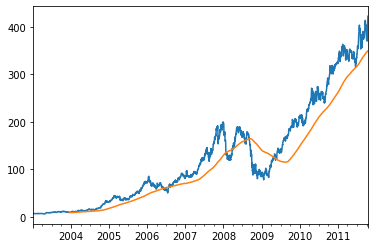

In [273]:
# rolling behaves like resample and groupby but is passed with a window argument expressed as number of periods
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

In [279]:
import matplotlib.pyplot as plt

plt.figure();
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Figure size 432x288 with 0 Axes>

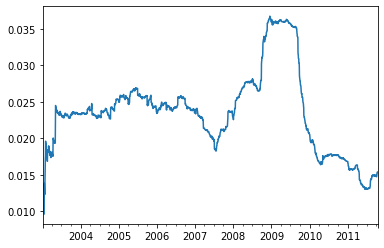

In [280]:
std250.plot();

<AxesSubplot:>

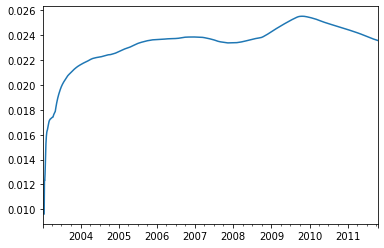

In [281]:
# Can also use an expanding window mean
expanding_mean = std250.expanding().mean()
expanding_mean.plot()

<AxesSubplot:>

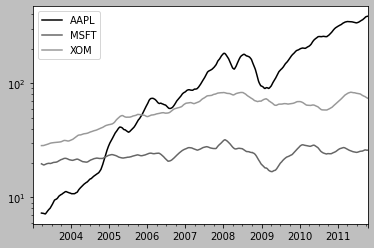

In [282]:
# Calling a moving window function on a DataFrame applies the action to each column
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [283]:
# Can also compute rolling values for nonstandard number of periods, like a 20-day rolling mean
close_px.rolling("20D").mean()

AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
...                ...        ...        ...
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333

[2292 rows x 3 columns]

Exponentially Weighted Functions

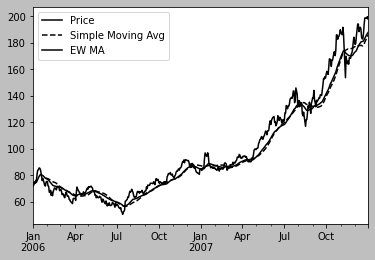

In [285]:
# The pandas operator ewm is an exponentially weighted moving function that applies a decay factor to a time series
# For example we can compare a 30 day moving average of Apple's stock with an EW moving average of span 60
aapl_px = close_px["AAPL"]["2006":"2007"]
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend();

Binary Moving Window Functions

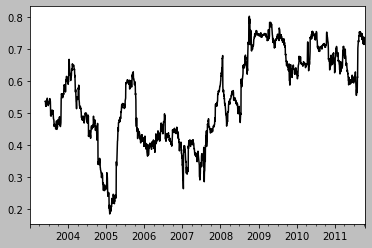

In [287]:
# Operations like correlation and covariance need to operate on two time series. 
# We can correlate a stock to the S&P 500, but we first need to compute the percent change for all of our time series of interest.
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot();

<AxesSubplot:>

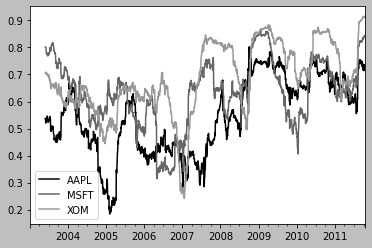

In [288]:
# From a DataFrame, we can compute the rolling correlations to the S&P500 across each column.
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

User-Defined Moving Window Functions

<AxesSubplot:>

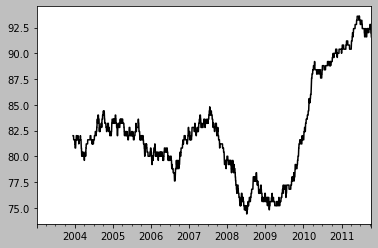

In [289]:
# Using apply after rolling applies an array function over a moving window. 
# For instance, we can a percentile rank of a particular value over a sample.
from scipy.stats import percentileofscore

def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()